In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [170]:
df=pd.read_csv("exams.csv")
data=df.copy()
data

,exam_1,exam_2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [171]:
data["exam_1"] = (data["exam_1"]-data["exam_1"].mean())/data["exam_1"].std()
data["exam_2"] = (data["exam_2"]-data["exam_2"].mean())/data["exam_2"].std()
# data["exam_1"] = (data["exam_1"]-data["exam_1"].min())/(data["exam_1"].max()-data["exam_1"].min())
# data["exam_2"] = (data["exam_2"]-data["exam_2"].min())/(data["exam_2"].max()-data["exam_2"].min())
data

,exam_1,exam_2,admitted
0,-1.594216,0.635141,0
1,-1.817101,-1.201489,0
2,-1.531325,0.359483,0
3,-0.280687,1.080923,1
4,0.688062,0.490905,1
...,...,...,...
95,0.917087,-0.960121,1
96,-1.201681,1.123720,1
97,1.730412,0.137407,1
98,-0.529558,-0.069422,1


In [172]:
x0=np.ones(len(data))

In [304]:
X=np.array([x0,data["exam_1"],data["exam_2"]])
Y=data["admitted"]
W=np.array([0,1,2])
X=X.T

In [307]:
def sigmoid(X,W):
    z=np.dot(X,W)
    return 1/(1+np.e**-z)
Z=sigmoid(X,W)
p=Z.copy()
p[p<0.5]=0
p[p>=0.5]=1

In [308]:
p

array([0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1.])

Iteration 0
0.3803356506404913
Iteration 1000
0.21882175674308013
Iteration 2000
0.2091494243468335
Iteration 3000
0.20600457280782788
Iteration 4000
0.20471012942631306
Iteration 5000
0.20411373380799794
Iteration 6000
0.20382056055462439
Iteration 7000
0.20367043445683847
Iteration 8000
0.20359143828179857
Iteration 9000
0.2035490827451666
Iteration 10000
0.2035260696139572


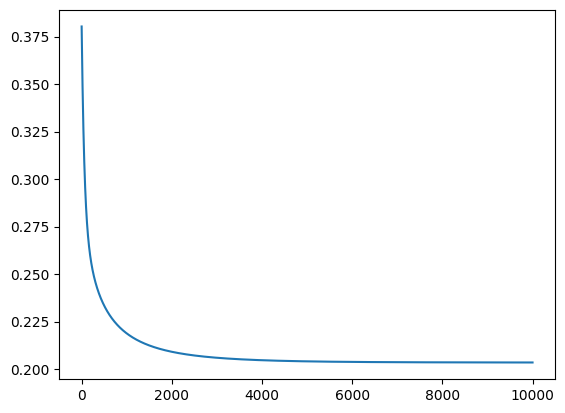

In [309]:
def gradientDescent(X,Y,W,alpha=0.05,iteration=10_000):
    costH=[]
    for i in range(iteration+1):
        
        H=sigmoid(X,W)
        g = np.dot(X.T,H-Y)/len(Y)
        W=W-alpha*g
        
        J = (-Y*np.log(H)-(1-Y)*np.log(1-H)).mean()
        costH.append(J)
      
        if i%1000==0:
            print(f"Iteration {i}")
            print(J)
    return costH,W

costH,Wn = gradientDescent(X.copy(),Y.copy(),W.copy())

plt.plot(costH)

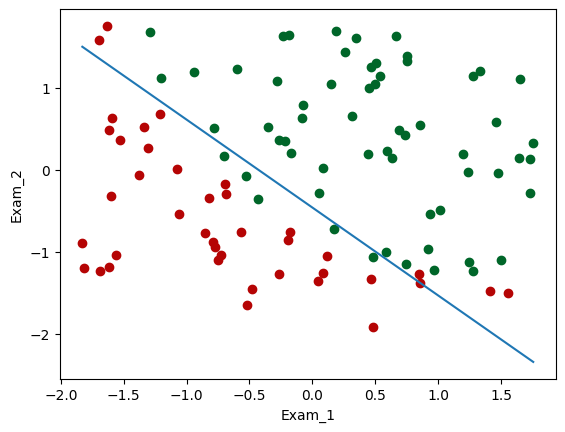

In [196]:
plt.ylabel("Exam_2")
plt.xlabel("Exam_1")

plt.scatter(data[data["admitted"]==1]["exam_1"],data[data["admitted"]==1]["exam_2"],color="#006629")

plt.scatter(data[data["admitted"]==0]["exam_1"],data[data["admitted"]==0]["exam_2"],color="#b50404")

xline=[data["exam_1"].min(),data["exam_1"].max()]

yline=-(Wn[0] + np.dot(Wn[1],xline))/Wn[2]
plt.plot(xline,yline)


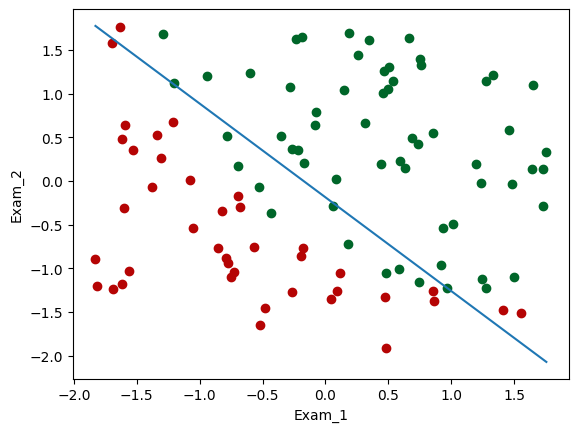

In [197]:
plt.ylabel("Exam_2")
plt.xlabel("Exam_1")

plt.scatter(data[data["admitted"]==1]["exam_1"],data[data["admitted"]==1]["exam_2"],color="#006629")
plt.scatter(data[data["admitted"]==0]["exam_1"],data[data["admitted"]==0]["exam_2"],color="#b50404")

xline=[data["exam_1"].min(),data["exam_1"].max()]
yline=(1-(Wn[0] + np.dot(Wn[1],xline)))/Wn[2]

plt.plot(xline,yline)

In [199]:
p

array([0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1.])

In [200]:
Z=sigmoid(X,Wn)
p=Z.copy()
p[p<0.5]=0
p[p>=0.5]=1

In [202]:
compareDf=pd.DataFrame(p)

In [208]:
compareDf.columns=["Predict"]

In [211]:
compareDf["Admitted"]=Y.copy()

In [215]:
accuracy = len(compareDf[compareDf["Predict"]==compareDf["Admitted"]])/len(compareDf)
accuracy

0.89

In [262]:
data.iloc[0:,0]

0    -1.594216
1    -1.817101
2    -1.531325
3    -0.280687
4     0.688062
        ...   
95    0.917087
96   -1.201681
97    1.730412
98   -0.529558
99    0.469294
Name: exam_1, Length: 100, dtype: float64

In [236]:
data

,exam_1,exam_2,admitted
0,-1.594216,0.635141,0
1,-1.817101,-1.201489,0
2,-1.531325,0.359483,0
3,-0.280687,1.080923,1
4,0.688062,0.490905,1
...,...,...,...
95,0.917087,-0.960121,1
96,-1.201681,1.123720,1
97,1.730412,0.137407,1
98,-0.529558,-0.069422,1


In [263]:
data[data["admitted"]==1].iloc[0:,0]

3    -0.280687
4     0.688062
6    -0.233198
7     0.482083
8     0.537280
9     0.965584
12    0.856336
13    0.191195
15   -0.599912
16    0.176063
18    0.257847
19    0.582505
21    1.235082
24    0.631086
25   -0.173359
26    0.747546
30   -0.219187
31    1.015522
33   -0.698875
37   -0.075407
40    0.938324
42    1.480048
46    0.593516
47    1.651093
48   -0.183532
49    1.332121
50    0.734936
51    1.728228
52    1.279790
56    1.644619
58    0.442200
59    0.316174
60    0.501142
66   -1.294400
68    0.752140
69    0.056657
71   -0.082482
72    0.344442
73   -0.266540
74   -0.349637
75    1.756768
76   -0.944588
77   -0.780447
80    1.195876
81    1.500149
82    0.086081
83   -0.431980
84    0.756620
85    0.145144
87    0.505361
88    0.667643
90    1.462110
91    1.274745
93    0.454739
94    1.243769
95    0.917087
96   -1.201681
97    1.730412
98   -0.529558
99    0.469294
Name: exam_1, dtype: float64

In [303]:
np.array([np.ones(len(data)),*np.array(data[["exam_1","exam_2"]]).T])==X

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  Tru

In [301]:
X

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1. 